In [1]:
from matplotlib import pyplot as plt
from pprint import pprint

import json
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict, namedtuple
from p4utils.utils.helper import load_topo
import numpy as np

if True:
    root_path = os.path.dirname(os.path.dirname(os.path.abspath('.')))
    os.chdir(root_path)
    from evaluation import Load

In [3]:
loader = Load.Loader()
pkt_df = loader.load_pkt_df()
sw_df = loader.load_sw_df()
topo = loader.get_topo()

In [6]:
sw_count = len(sw_df.sw_id.unique())
sw_count

7

In [12]:
sw_df

,sw_id,ingress_port,egress_port,meta_ingress_port,meta_egress_port,timestamp,qdepth,path_id3,packet_length,enq_timestamp,deq_timedelta,enq_qdepth,flow,pkt_id
0,4,1,5,0,5,255835449164157,0,1,81,1427211998,58,0,h3-h8,0
1,2,3,5,3,5,255835449166750,0,4,111,1427214068,47,0,h3-h8,0
2,6,5,2,5,0,255835449168845,0,5,141,1427215933,77,0,h3-h8,0
3,4,1,5,0,5,255835449228256,0,1,81,1427275831,39,0,h3-h8,1
4,2,3,5,3,5,255835449230389,0,4,111,1427277367,27,0,h3-h8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,2,2,5,2,5,255835457743896,0,0,111,1435791650,96,0,h2-h8,321
965,6,5,2,5,0,255835457747928,0,4,141,1435795710,82,0,h2-h8,321
966,3,2,5,0,5,255835457788779,0,0,81,1435837854,76,0,h2-h8,322
967,2,2,5,2,5,255835457793187,0,0,111,1435840916,91,0,h2-h8,322


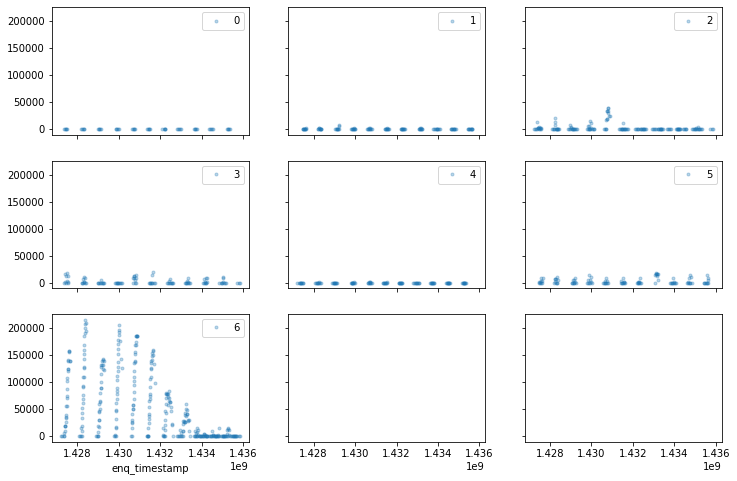

In [26]:
fig_col = round(np.sqrt(sw_count))
fig_row = int(np.ceil(sw_count / fig_col))
fig_col, fig_row = max(fig_col, fig_row), min(fig_col, fig_row)
fig, axes = plt.subplots(nrows=fig_row, ncols=fig_col, figsize=(12,8), sharex=True, sharey=True)

for k, (swid, swdf) in enumerate(sw_df.groupby("sw_id")):
    i = k // fig_row
    j = k % fig_row
    swdf.plot('enq_timestamp', 'deq_timedelta', label=swid, ax=axes[i][j], alpha=0.3, lw=1, marker='.', ls='')
    # axes[i][j].set_title(swid)

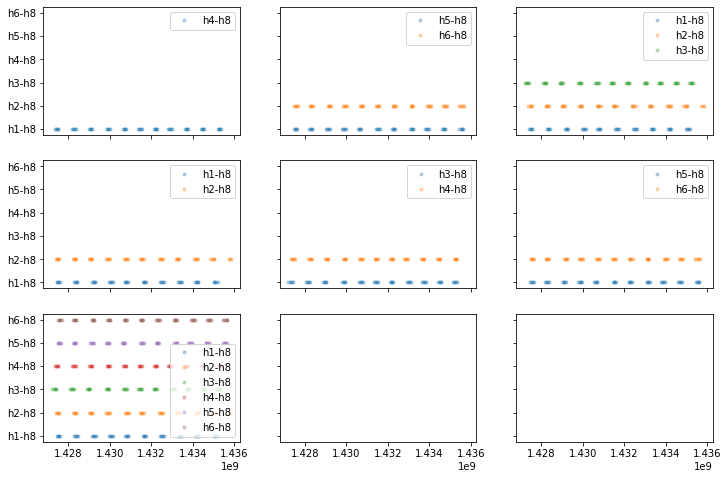

In [57]:
fig, axes = plt.subplots(nrows=fig_row, ncols=fig_col, figsize=(12,8), sharex=True, sharey=True)


for k, (swid, swdf) in enumerate(sw_df.groupby("sw_id")):
    i = k // fig_row
    j = k % fig_row
    ax = axes[i][j]
    yticks, yticklabels = [], []
    for fi, (flow, flowdf) in enumerate(swdf.groupby("flow")):
        timestamps = flowdf.enq_timestamp.tolist()
        yticklabels.append(flow)
        yticks.append(fi)
        ax.plot(timestamps, [fi]*len(timestamps), label=flow, alpha=0.3, lw=1, marker='.', ls='')
        ax.legend()
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels)
    # break
    # axes[i][j].set_title(swid)

[Text(0, 0, 'h1-h8'),
 Text(0, 1, 'h2-h8'),
 Text(0, 2, 'h3-h8'),
 Text(0, 3, 'h4-h8'),
 Text(0, 4, 'h5-h8'),
 Text(0, 5, 'h6-h8')]

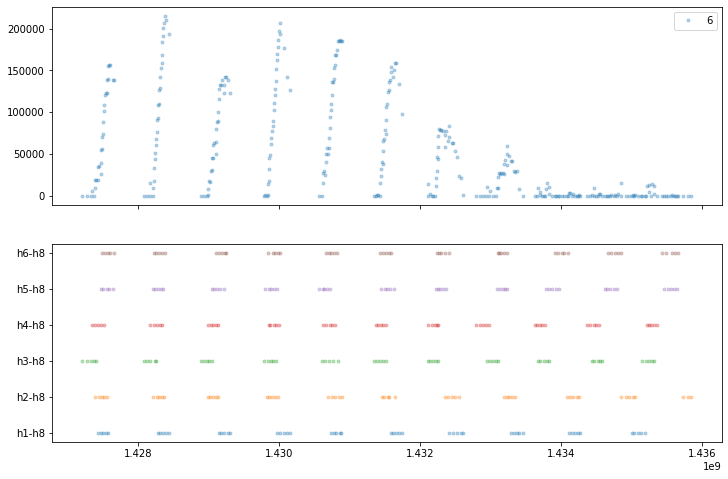

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8)) 
swid = 6

swdf.plot('enq_timestamp', 'deq_timedelta', label=swid, ax=axes[0], alpha=0.3, lw=1, marker='.', ls='')


swdf = sw_df[sw_df.sw_id==swid]
yticks, yticklabels = [], []
for fi, (flow, flowdf) in enumerate(swdf.groupby("flow")):
    timestamps = flowdf.enq_timestamp.tolist()
    yticklabels.append(flow)
    yticks.append(fi)
    ax = axes[1]
    ax.plot(timestamps, [fi]*len(timestamps), label=flow, alpha=0.3, lw=1, marker='.', ls='')
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

<AxesSubplot:xlabel='enq_timestamp'>

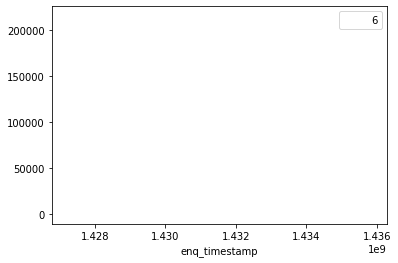

In [17]:
sw_df[sw_df.sw_id==swid].plot('enq_timestamp', 'deq_timedelta', label=swid, alpha=0.3, lw=1, ls='')
